In [1]:
!pip install torch

In [2]:
import os
import matplotlib.pyplot as plt
import model
import torch

from constants import model_params, base_data_path
from IPython.display import Image 
from matplotlib.pyplot import imshow
from utils import *


no display found. Using non-interactive Agg backend
No module named 'foundations'


In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# see issue #152
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# Directory from which we read the data
mode = "unlabeled"  # real, fake, or unlabeled

# Convert files to flac
# convert_to_flac(os.path.join(data_dir,mode))
dirpath = '../datasets/train/audios'
# filenames = os.listdir(dirpath)
# filenames = [f'{dirpath}/{filename}' for filename in filenames]
# filenames = filenames[:2]
filenames = ['032bf1a78f9280e7.aac']
print(filenames)

['032bf1a78f9280e7.aac']


In [4]:
print(dirpath)
# print(os.path.join(filenames[0], dirpath, mode))
processed_data = preprocess_from_filenames(
    filenames=filenames, dirpath=dirpath, mode='unlabeled',
    use_parallel=True
)

../datasets/train/audios


100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.23it/s]
/home/milselarch/projects/AISG/venv/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [5]:
model_params

{'num_freq_bin': 240,
 'num_conv_blocks': 8,
 'num_conv_filters': 32,
 'spatial_dropout_fraction': 0.05,
 'num_dense_layers': 1,
 'num_dense_neurons': 50,
 'dense_dropout': 0,
 'learning_rate': 0.0001,
 'epochs': 1,
 'batch_size': 156,
 'residual_con': 2,
 'use_default': True,
 'model_save_dir': 'fitted_objects'}

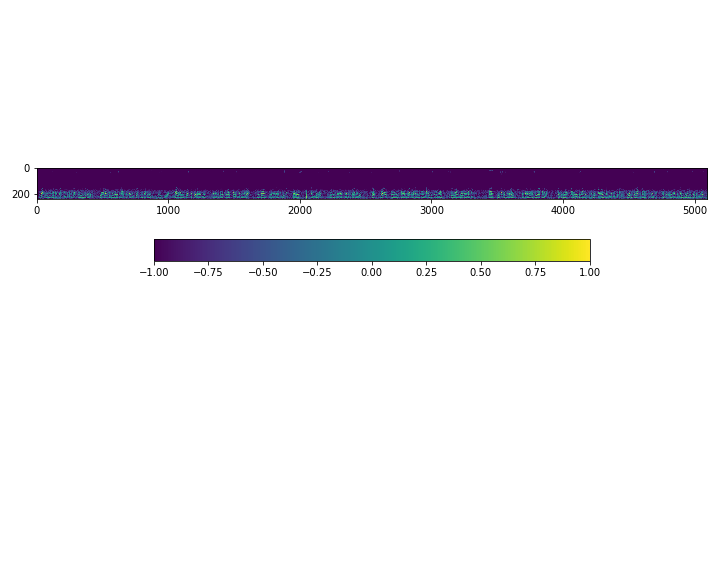

In [6]:
%matplotlib inline
image_path = 'visualize_inference_spectrogram.png'
plot_spectrogram(
    processed_data[0],
    path=image_path
)
pil_img = Image(filename=image_path)
display(pil_img)

In [7]:
print(model_params)
discriminator = model.Discriminator(
    num_freq_bin=model_params['num_freq_bin'],
    init_neurons=model_params['num_conv_filters'],
    num_conv_blocks=model_params['num_conv_blocks'],
    residual_con=model_params['residual_con'],
    num_dense_neurons=model_params['num_dense_neurons'],
    dense_dropout=model_params['dense_dropout'],
    num_dense_layers=model_params['num_dense_layers'],
)

{'num_freq_bin': 240, 'num_conv_blocks': 8, 'num_conv_filters': 32, 'spatial_dropout_fraction': 0.05, 'num_dense_layers': 1, 'num_dense_neurons': 50, 'dense_dropout': 0, 'learning_rate': 0.0001, 'epochs': 1, 'batch_size': 156, 'residual_con': 2, 'use_default': True, 'model_save_dir': 'fitted_objects'}
CONV LAYER 0 3
Sequential(
  (0): Conv1d(240, 32, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV LAYER 1 3
Sequential(
  (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV LAYER 2 3
Sequential(
  (0): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
RES CONV LAYER 2 3
Sequential(
  (0): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (1): Linear(in_features=1, out_feature

In [8]:
discriminator.res_convnet_3_layers

{0: None,
 1: None,
 2: Sequential(
   (0): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
   (1): Linear(in_features=1, out_features=1, bias=True)
 ),
 3: Sequential(
   (0): Conv1d(128, 192, kernel_size=(1,), stride=(1,))
   (1): Linear(in_features=1, out_features=1, bias=True)
 ),
 4: Sequential(
   (0): Conv1d(192, 256, kernel_size=(1,), stride=(1,))
   (1): Linear(in_features=1, out_features=1, bias=True)
 ),
 5: Sequential(
   (0): Conv1d(256, 320, kernel_size=(1,), stride=(1,))
   (1): Linear(in_features=1, out_features=1, bias=True)
 ),
 6: Sequential(
   (0): Conv1d(320, 384, kernel_size=(1,), stride=(1,))
   (1): Linear(in_features=1, out_features=1, bias=True)
 ),
 7: Sequential(
   (0): Conv1d(384, 448, kernel_size=(1,), stride=(1,))
   (1): Linear(in_features=1, out_features=1, bias=True)
 )}

In [10]:
# print(processed_data[0])

input_batch = processed_data[0][:model_params['batch_size']]
pad_batch = get_zero_pad(input_batch)
keras_batch_x = pad_batch.reshape((-1, 1, hparams.num_mels))
batch_x = torch.tensor(keras_batch_x).permute(0, 2, 1)
inputs = batch_x

print('KERAS BATCH SIZE')
print(keras_batch_x.shape)
print('')

print(processed_data[0].shape)
print(input_batch.shape)
print(pad_batch.shape)
print(batch_x.shape)
print(inputs.shape)
# print(inputs)

# pred = audioNet(inputs)
conv_batch = discriminator.convnet_3_layers[0]
start_conv = discriminator.convnet_3_layers[0][0]
linear = discriminator.convnet_3_layers[0][1]
relu = discriminator.convnet_3_layers[0][2]

start_conv_1 = discriminator.convnet_3_layers[1][0]
# linear_1 = discriminator.convnet_3_layers[1][1]
# relu_1 = discriminator.convnet_3_layers[1][2]
conv_batch_1 = discriminator.convnet_3_layers[1]
conv_batch_2 = discriminator.convnet_3_layers[2]
res_conv_batch_2 = discriminator.res_convnet_3_layers[2]

print(conv_batch_1)

print(start_conv)
print(linear)
conv_pred = conv_batch(inputs)
conv_pred_1 = conv_batch_1(conv_pred)
conv_pred_2 = conv_batch_2(conv_pred_1)

res_conv_pred_2 = res_conv_batch_2(conv_pred_1)
total = torch.add(conv_pred_2, res_conv_pred_2)

print('')
print('PRED PRODUCTION')
print(conv_pred_2.shape)
print(res_conv_pred_2.shape)
# print(total)

# print(pred)

final_pred = discriminator(inputs)

print('DENSE LAYERS', discriminator.num_dense_layers)
# print('FPRED', video_pred.shape)

KERAS BATCH SIZE
(156, 1, 240)

(5095, 240)
(156, 240)
(156, 240)
torch.Size([156, 240, 1])
torch.Size([156, 240, 1])
Sequential(
  (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
Conv1d(240, 32, kernel_size=(3,), stride=(1,), padding=(2,))
Linear(in_features=3, out_features=1, bias=True)

PRED PRODUCTION
torch.Size([156, 128, 1])
torch.Size([156, 128, 1])
KERNEL 3
LAYER NO 0
CONVNET LAYER Sequential(
  (0): Conv1d(240, 32, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([156, 32, 1])
LAYER NO 1
CONVNET LAYER Sequential(
  (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([156, 64, 1])
LAYER NO 2
CONVNET LAYER Sequential(
  (0): Co

In [20]:
torch.vstack([torch.tensor([1,2, 5]), torch.tensor([2, 3, 5])]).shape

torch.Size([2, 3])

In [11]:
video_input = processed_data[0]
keras_batch_vid = video_input.reshape((-1, 1, hparams.num_mels))
batch_vid = torch.tensor(keras_batch_vid).permute(0, 2, 1)

print(processed_data[0].shape)
print(video_input.shape)
video_pred = discriminator(batch_vid)
print(video_pred.shape)

(5095, 240)
(5095, 240)
KERNEL 3
LAYER NO 0
CONVNET LAYER Sequential(
  (0): Conv1d(240, 32, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([5095, 32, 1])
LAYER NO 1
CONVNET LAYER Sequential(
  (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([5095, 64, 1])
LAYER NO 2
CONVNET LAYER Sequential(
  (0): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([5095, 128, 1])
RES CONVNET LAYER Sequential(
  (0): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (1): Linear(in_features=1, out_features=1, bias=True)
)
RES CONV SHAPE torch.Size([5095, 128, 1])
CONV ADD SHAPE torch.Size([5095, 128, 1])
LAYER NO 3
CONVNET LAYER Se

CONV SHAPE torch.Size([5095, 256, 1])
RES CONVNET LAYER Sequential(
  (0): Conv1d(192, 256, kernel_size=(1,), stride=(1,))
  (1): Linear(in_features=1, out_features=1, bias=True)
)
RES CONV SHAPE torch.Size([5095, 256, 1])
CONV ADD SHAPE torch.Size([5095, 256, 1])
LAYER NO 5
CONVNET LAYER Sequential(
  (0): Conv1d(256, 320, kernel_size=(7,), stride=(1,), padding=(6,))
  (1): Linear(in_features=7, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([5095, 320, 1])
RES CONVNET LAYER Sequential(
  (0): Conv1d(256, 320, kernel_size=(1,), stride=(1,))
  (1): Linear(in_features=1, out_features=1, bias=True)
)
RES CONV SHAPE torch.Size([5095, 320, 1])
CONV ADD SHAPE torch.Size([5095, 320, 1])
LAYER NO 6
CONVNET LAYER Sequential(
  (0): Conv1d(320, 384, kernel_size=(7,), stride=(1,), padding=(6,))
  (1): Linear(in_features=7, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([5095, 384, 1])
RES CONVNET LAYER Sequential

In [12]:
test_pred = discriminator.test(inputs)

def pool(x):
    res_preds = x[1]
    torch_batch = x[0]
    
    print(torch_batch.shape)
    t_mask = torch.eq(torch.from_numpy(torch_batch), 0)
    t_mask = 1 - t_mask.float()
    print(t_mask.shape)

    t_mask = torch.all(t_mask, dim=-2, keepdim=True)
    print(t_mask.shape)

    t_steps_per_sample = torch.sum(t_mask, dim=2, keepdim=False)
    print(t_steps_per_sample.shape)
    t_target = torch.from_numpy(res_preds) * t_mask
    print(t_target.shape)
    t_total = torch.sum(t_target, dim=2, keepdim=False)
    print(t_total.shape)

    t_means = t_total / t_steps_per_sample
    print(t_means.shape)
    return t_means

LAYER NO 0
CONVNET LAYER Sequential(
  (0): Conv1d(240, 32, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([156, 32, 1])
LAYER NO 1
CONVNET LAYER Sequential(
  (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([156, 64, 1])
LAYER NO 2
CONVNET LAYER Sequential(
  (0): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=3, out_features=1, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
)
CONV SHAPE torch.Size([156, 128, 1])
RES CONVNET LAYER Sequential(
  (0): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (1): Linear(in_features=1, out_features=1, bias=True)
)
RES CONV SHAPE torch.Size([156, 128, 1])
CONV ADD SHAPE torch.Size([156, 128, 1])
LAYER NO 3
CONVNET LAYER Sequential(
  (0): Conv1d(128, 192, kern

In [ ]:
pool_pred = model.custom_pooling([inputs, test_pred])
c_pool_pred = pool([inputs.numpy(), test_pred.detach().numpy()])

print('INPUTS')
print(inputs.shape, test_pred.shape)
print('C_POOL')
print(pool_pred.shape)
print(c_pool_pred.shape)

In [ ]:
discriminator.convnet_3_layers[0](batch_x)

In [ ]:
discriminator.convnet_3_layers[0]